In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("ROUND_3.csv", index_col=0)
df.head()

,appl_month,prod_name,acq_channel,state_code,bureau_src,risk_score_1,bureau_score,limit,income,old_open_trd_ms,...,merchant3,merchant3_amt,merchant3_ten,merchant3_cat,risk_score_8,risk_score_9,risk_score_10,risk_score_11,default_ind,strategy_hit
unique_identifier,,,,,,,,,,,,,,,,,,,,,
116356,Feb,NaN,Channel 4,CA,No Bureau Hit,0.0,800,5000,45000,0,...,0,0.0,0,0,0.000,0.0000,0.012,0.2787,0,0
110872,Feb,NaN,Channel 3,GA,Bureau 1,0.1,775,13000,100000,352,...,0,0.0,0,0,0.999,0.0092,0.070,0.2275,0,0
158686,Jun,NaN,Channel 1,CA,Bureau 1,5.6,900,2000,100000,1,...,0,0.0,0,0,0.002,0.0015,0.035,0.2787,1,1
148772,May,NaN,Channel 3,DC,No Bureau Hit,0.0,800,5000,170000,0,...,0,0.0,0,0,0.252,0.0253,0.131,0.1175,0,0
158473,Jun,NaN,Channel 2,VA,Bureau 1,0.1,775,10000,40000,267,...,0,0.0,0,0,0.000,0.0000,0.000,0.2035,0,0


In [3]:

missing_values = df.isna().sum()
df['risk_score_product'] = df[['risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5', 'risk_score_6',
                               'risk_score_7', 'risk_score_8', 'risk_score_9', 'risk_score_10', 'risk_score_11']].prod(axis=1)
print("Number of missing values in each feature:")
print(missing_values)


Number of missing values in each feature:
appl_month           0
prod_name        62484
acq_channel          0
state_code           0
bureau_src           0
                 ...  
risk_score_9         0
risk_score_10        0
risk_score_11        0
default_ind          0
strategy_hit         0
Length: 61, dtype: int64


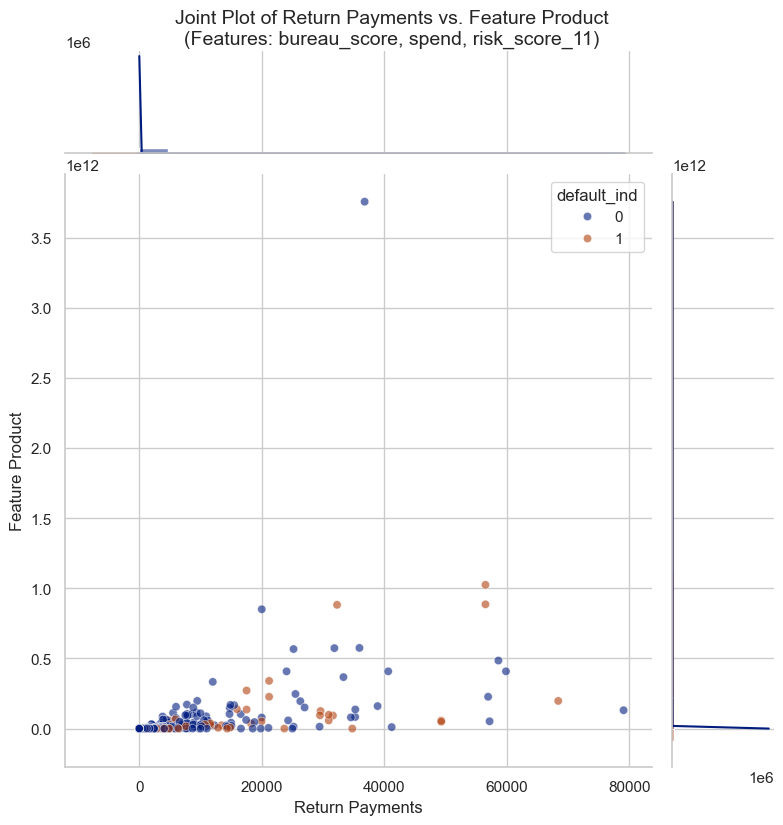

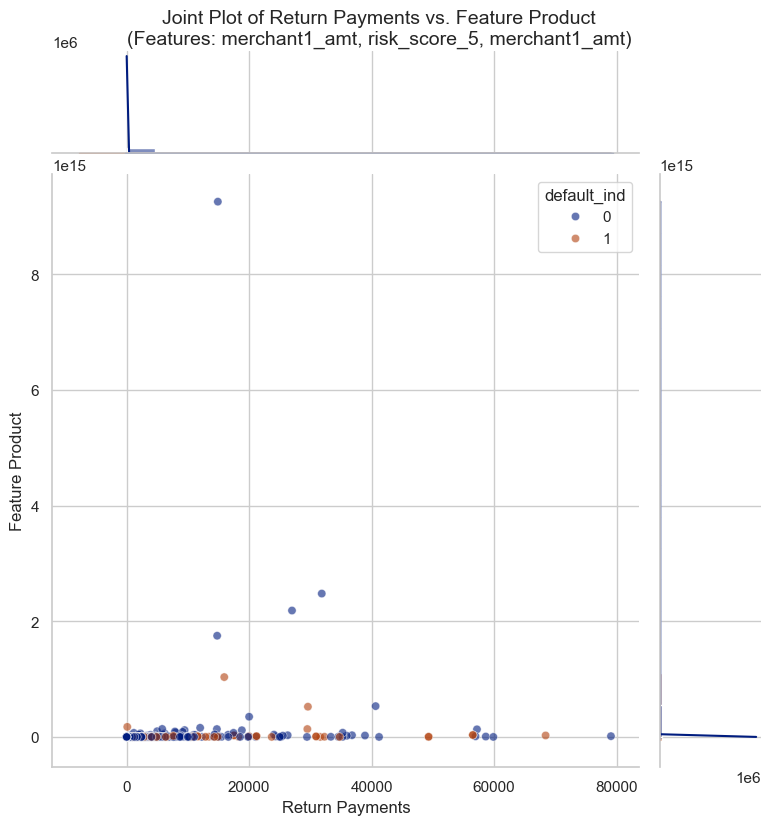

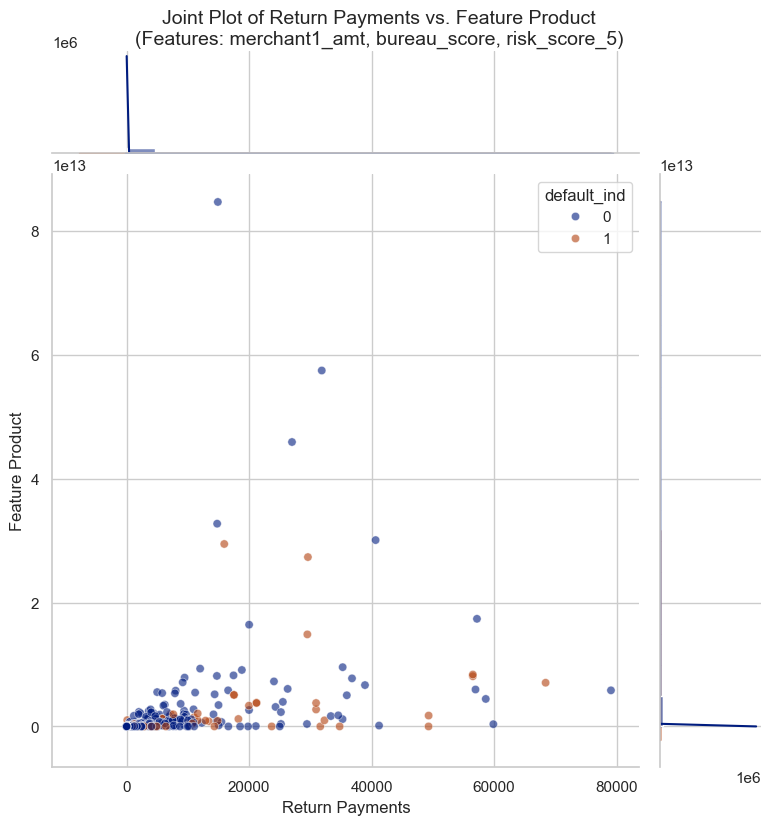

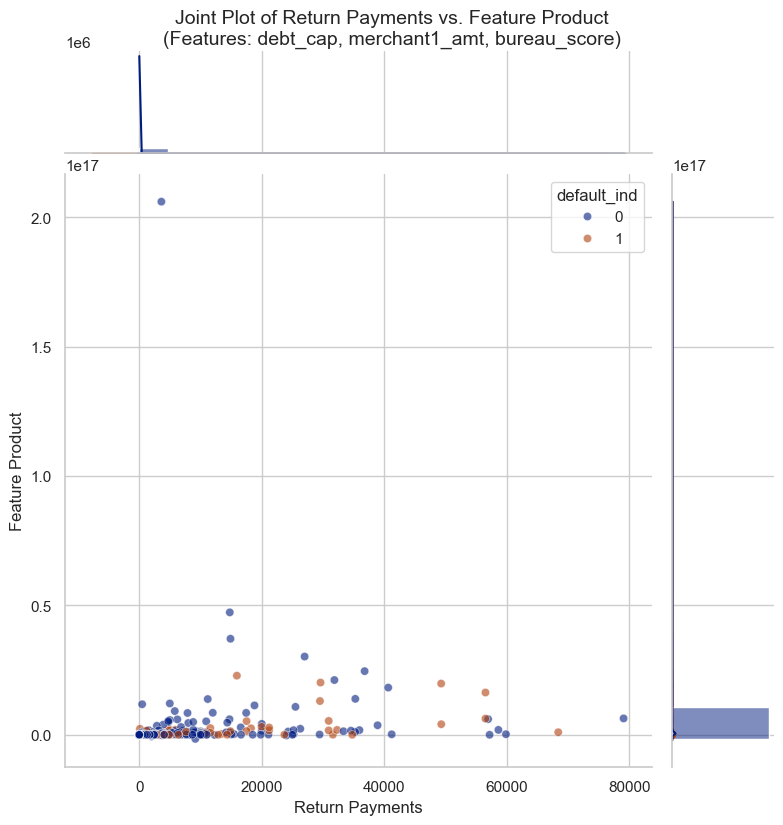

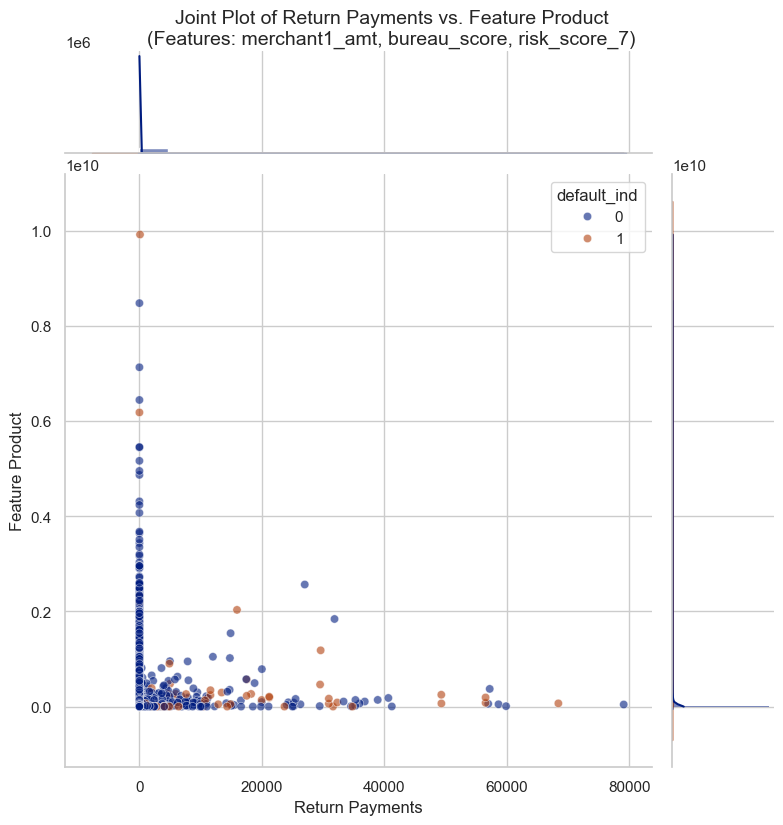

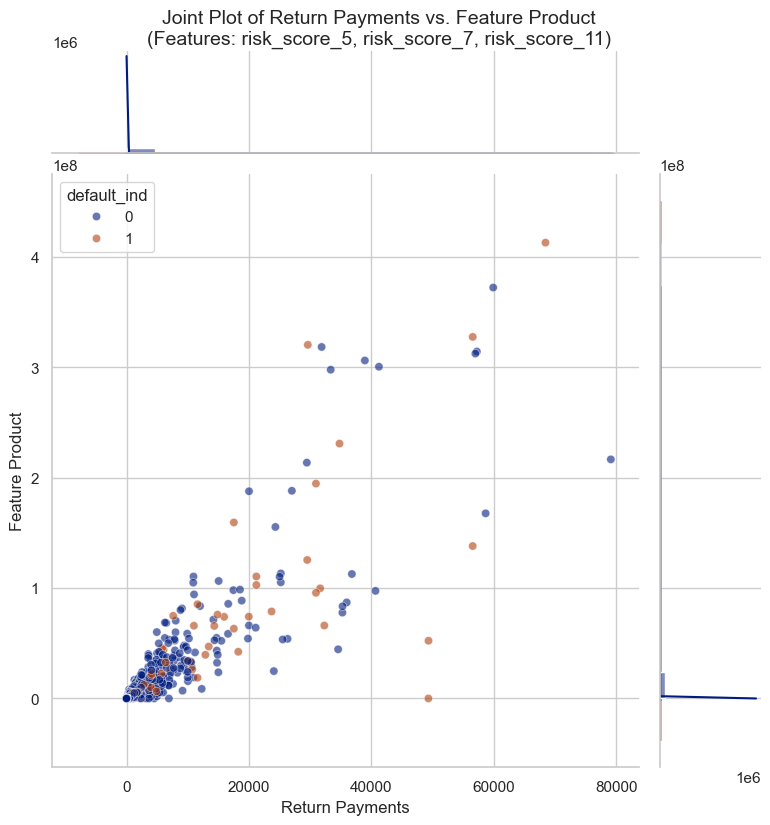

KeyboardInterrupt: 

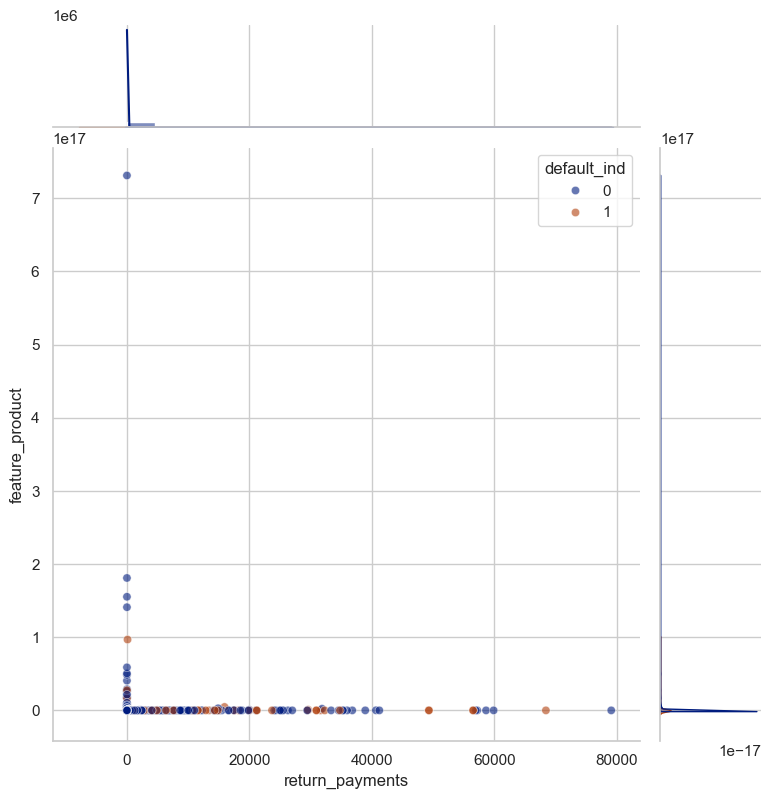

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import random

# Load your dataset
df = pd.read_csv('ROUND_3.csv')

# Specify the features to include based on their importance
important_features = [
    'debt_cap', 'risk_score_4', 'merchant1_amt', 'bureau_score',
    'spend', 'decline_txn', 'merchant2_amt', 'risk_score_5',
    'merchant1_amt', 'risk_score_7', 'trust_identity', 'risk_score_11','return_payments'
]

# Filter out numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Ensure the specified features are in the numeric columns
feature_columns = [col for col in important_features if col in numeric_columns]

# Generate all possible combinations of 3 features
combinations = list(itertools.combinations(feature_columns, 4))

# Shuffle combinations to try random scenarios
random.shuffle(combinations)

# Select a random sample of combinations to plot (adjust sample size as needed)
sampled_combinations = random.sample(combinations, min(len(combinations), 1000))  # adjust '1000' to control the number of plots

# Iterate over the sampled combinations and create plots
for combo in sampled_combinations:
    # Calculate the product of the three features and multiply by 'return_payments'
    df['feature_product'] = df[list(combo)].prod(axis=1)
    
    # Create a jointplot with return_payments on the x-axis
    sns.set(style="whitegrid")
    plot = sns.jointplot(x='return_payments', y='feature_product', hue='default_ind', data=df, 
                         palette='dark', height=8, kind='scatter', alpha=0.6)
    
    # Add marginal histograms
    plot.plot_marginals(sns.histplot, kde=True, color=".5")
    
    # Set axis labels and title with feature names
    plot.set_axis_labels('Return Payments', 'Feature Product', fontsize=12)
    plt.suptitle(f'Joint Plot of Return Payments vs. Feature Product\n(Features: {combo[0]}, {combo[1]}, {combo[2]})', 
                 y=1.03, fontsize=14)
    
    # Show the plot
    plt.show()


In [5]:
unique_counts = df.nunique()

# Print the number of unique values for each column
print(unique_counts)

unique_identifier    62484
appl_month               6
prod_name                0
acq_channel              4
state_code              53
                     ...  
risk_score_10          635
risk_score_11          138
default_ind              2
strategy_hit             2
feature_product      44518
Length: 63, dtype: int64


In [6]:
max_values = df.select_dtypes(include=['number']).max()
min_values = df.select_dtypes(include=['number']).min()
print("Maximum values for each numeric column:")
print(max_values)
print("Minimum values for each numeric column:")
print(min_values)

Maximum values for each numeric column:
unique_identifier        1.624840e+05
prod_name                         NaN
risk_score_1             7.740000e+01
bureau_score             9.000000e+02
limit                    5.000000e+04
income                   1.000000e+06
old_open_trd_ms          7.860000e+02
no_open_trd              8.100000e+01
no_trd                   1.390000e+02
debt_cap                 1.090704e+08
basic_max_trd_tnr        7.570000e+02
basic_no_trd             1.340000e+02
risk_score_2             9.071100e-01
risk_score_3             1.000000e+03
no_inq                   2.600000e+01
risk_score_4             9.950000e+02
income_incons            9.500000e+02
bureau_mismatch          3.000000e+00
risk_score_5             9.900000e+01
risk_score_6             9.900000e+01
basic_old_open_trd_ms    7.480000e+02
addr_ds                  1.674300e+04
dl_id                    7.000000e+00
addr_changes             6.000000e+00
no_phn_to_addr           1.750000e+02
no_nid_to_

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Average risk_score_1 for default_ind = 0:  3.9882999493817337
Average risk_score_1 for default_ind = 1:  3.379153094462541


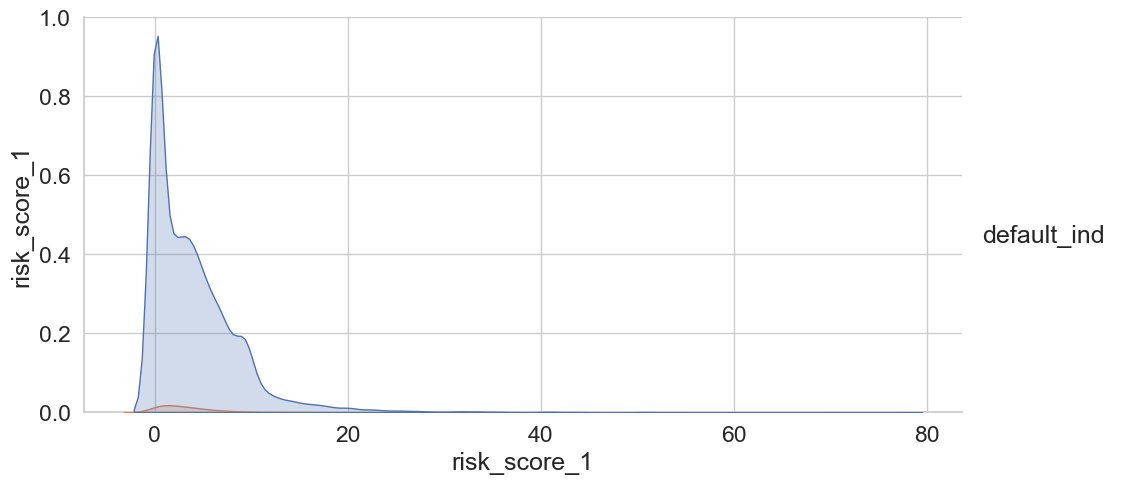

In [10]:

df = pd.read_csv("NEW_FILE_REDUCED.csv", index_col=0)
subset_df = df[['risk_score_1', 'default_ind']]
average_risk = subset_df.groupby('default_ind')['risk_score_1'].mean()
print("Average risk_score_1 for default_ind = 0: ", average_risk[0])
print("Average risk_score_1 for default_ind = 1: ", average_risk[1])

sns.set_context("notebook", font_scale=1.5) 

sns.pairplot(subset_df, hue='default_ind', height=5, aspect=2)

plt.show()


C:\Users\91917\AppData\Local\Temp\ipykernel_14944\2741093527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_risk.index, y=average_risk.values, palette='viridis')


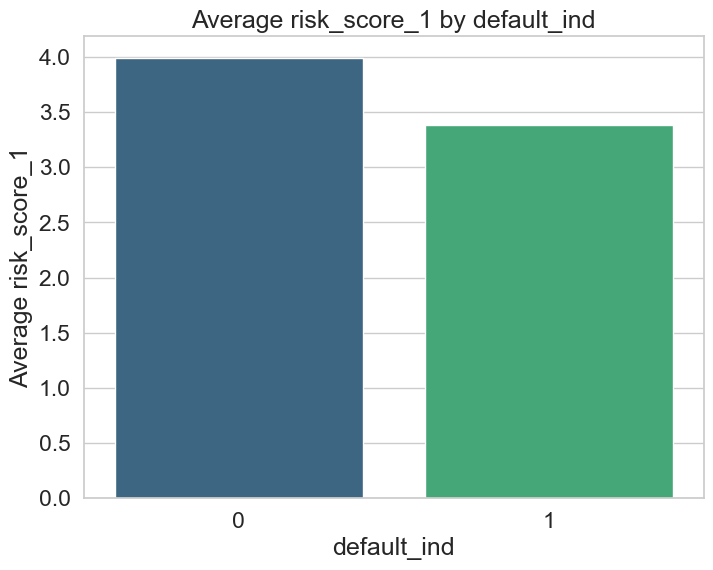

C:\Users\91917\AppData\Local\Temp\ipykernel_14944\2741093527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_risk.index, y=average_risk.values, palette='viridis')


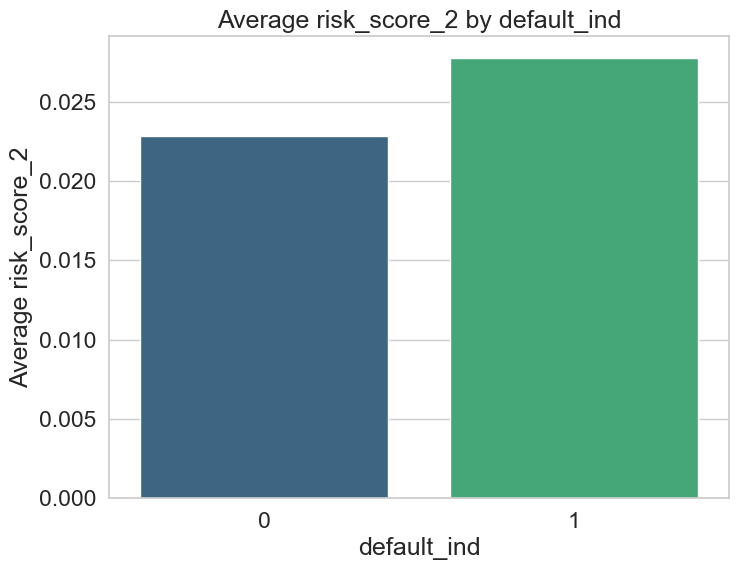

C:\Users\91917\AppData\Local\Temp\ipykernel_14944\2741093527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_risk.index, y=average_risk.values, palette='viridis')


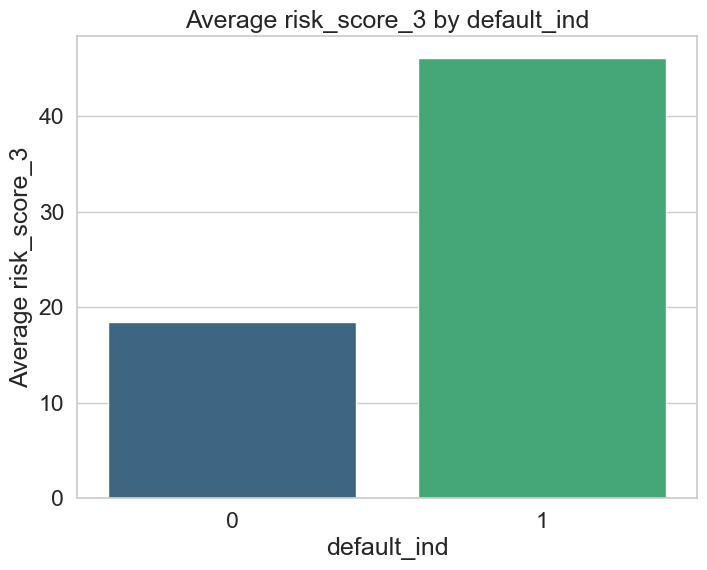

C:\Users\91917\AppData\Local\Temp\ipykernel_14944\2741093527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_risk.index, y=average_risk.values, palette='viridis')


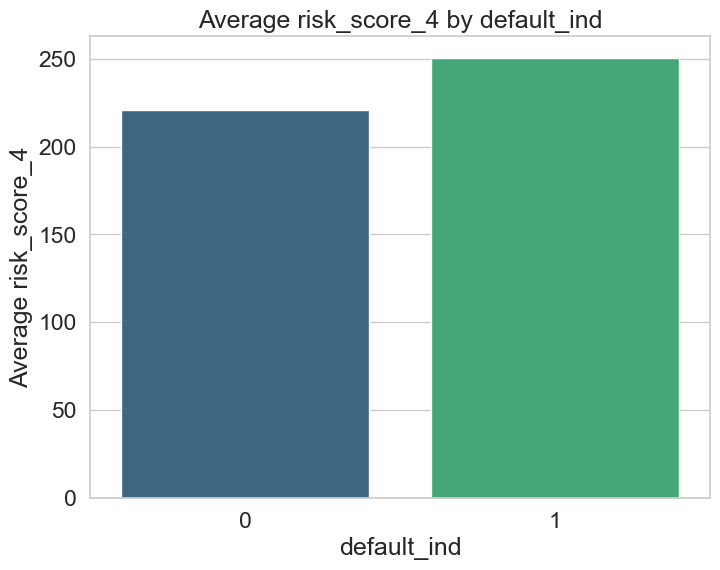

C:\Users\91917\AppData\Local\Temp\ipykernel_14944\2741093527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_risk.index, y=average_risk.values, palette='viridis')


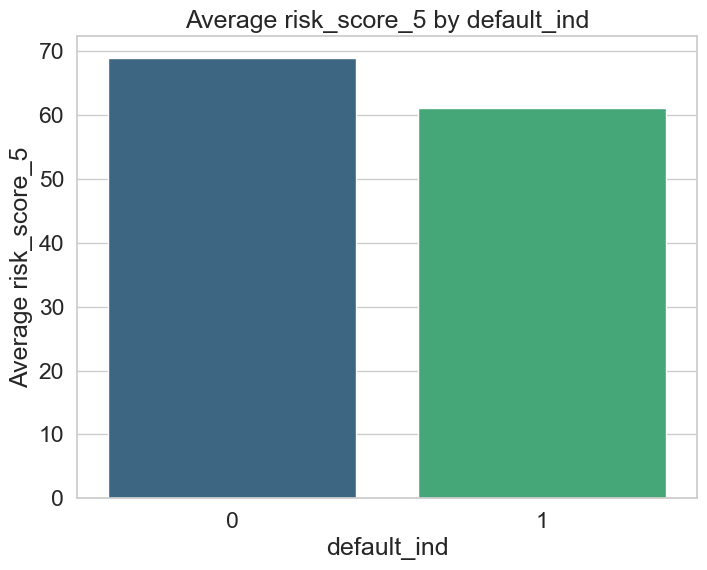

C:\Users\91917\AppData\Local\Temp\ipykernel_14944\2741093527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_risk.index, y=average_risk.values, palette='viridis')


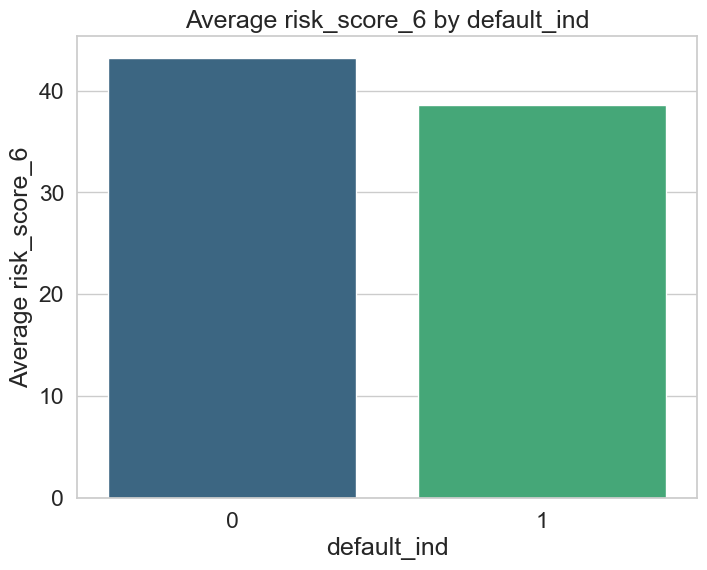

C:\Users\91917\AppData\Local\Temp\ipykernel_14944\2741093527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_risk.index, y=average_risk.values, palette='viridis')


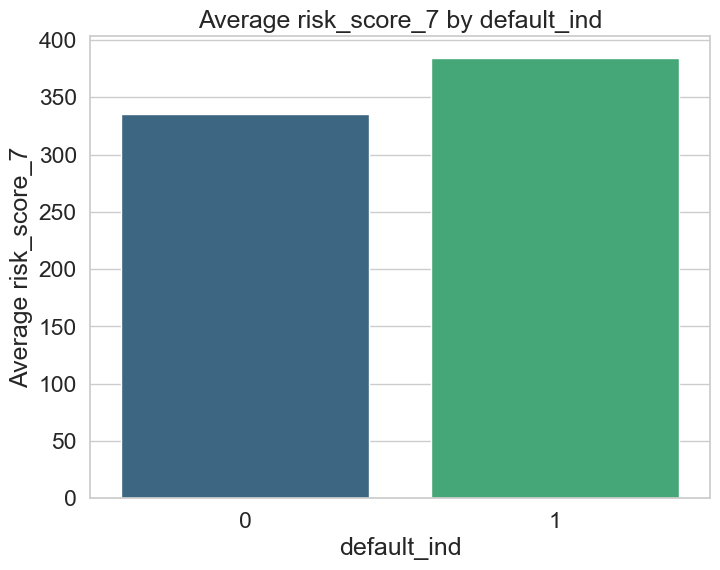

C:\Users\91917\AppData\Local\Temp\ipykernel_14944\2741093527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_risk.index, y=average_risk.values, palette='viridis')


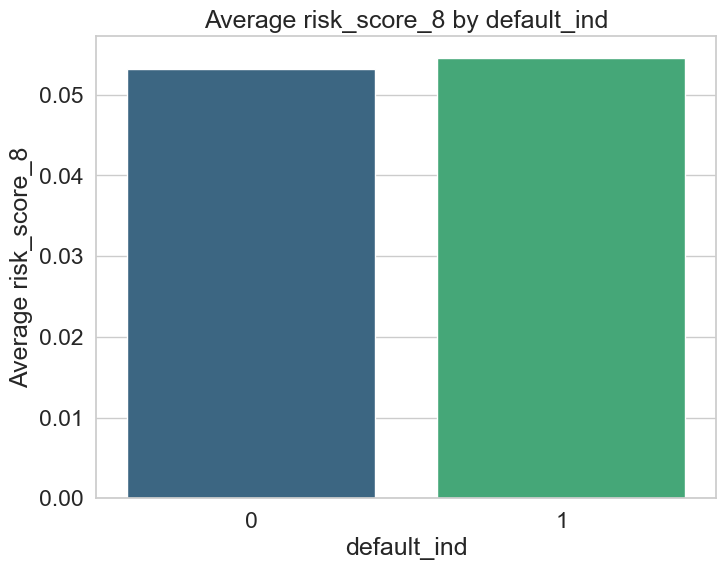

C:\Users\91917\AppData\Local\Temp\ipykernel_14944\2741093527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_risk.index, y=average_risk.values, palette='viridis')


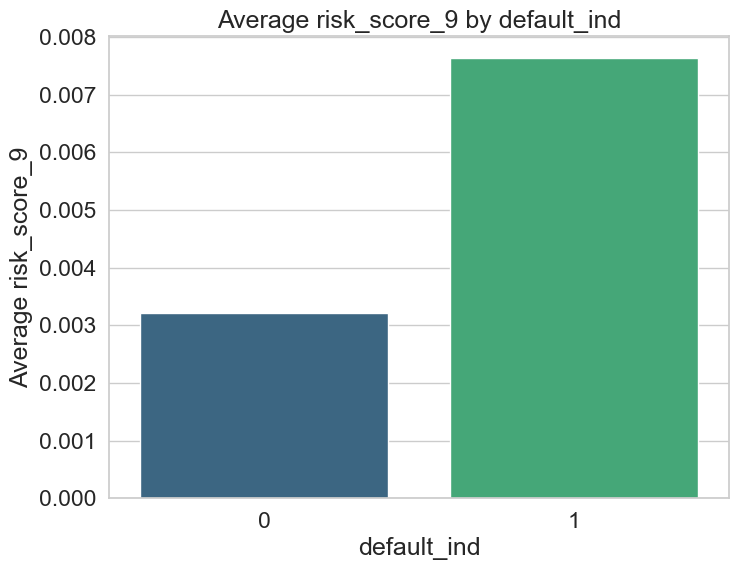

C:\Users\91917\AppData\Local\Temp\ipykernel_14944\2741093527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_risk.index, y=average_risk.values, palette='viridis')


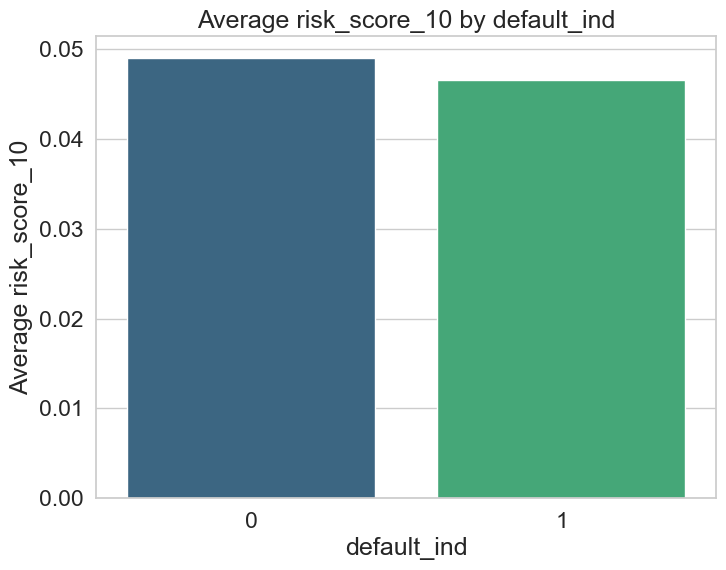

C:\Users\91917\AppData\Local\Temp\ipykernel_14944\2741093527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_risk.index, y=average_risk.values, palette='viridis')


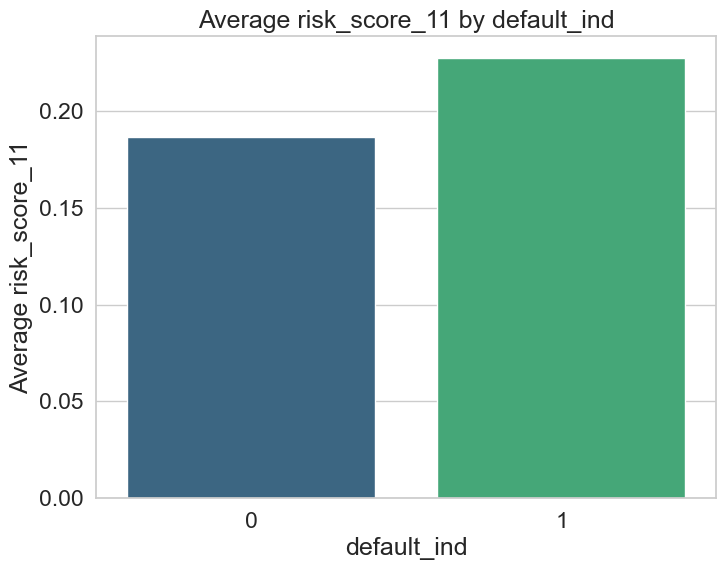

In [11]:

risk_columns = [f'risk_score_{i}' for i in range(1, 12)]

for risk_col in risk_columns:
    plt.figure(figsize=(8, 6))
    
    average_risk = df.groupby('default_ind')[risk_col].mean()
    
    sns.barplot(x=average_risk.index, y=average_risk.values, palette='viridis')
    plt.xlabel('default_ind')
    plt.ylabel(f'Average {risk_col}')
    plt.title(f'Average {risk_col} by default_ind')
 
    plt.show()


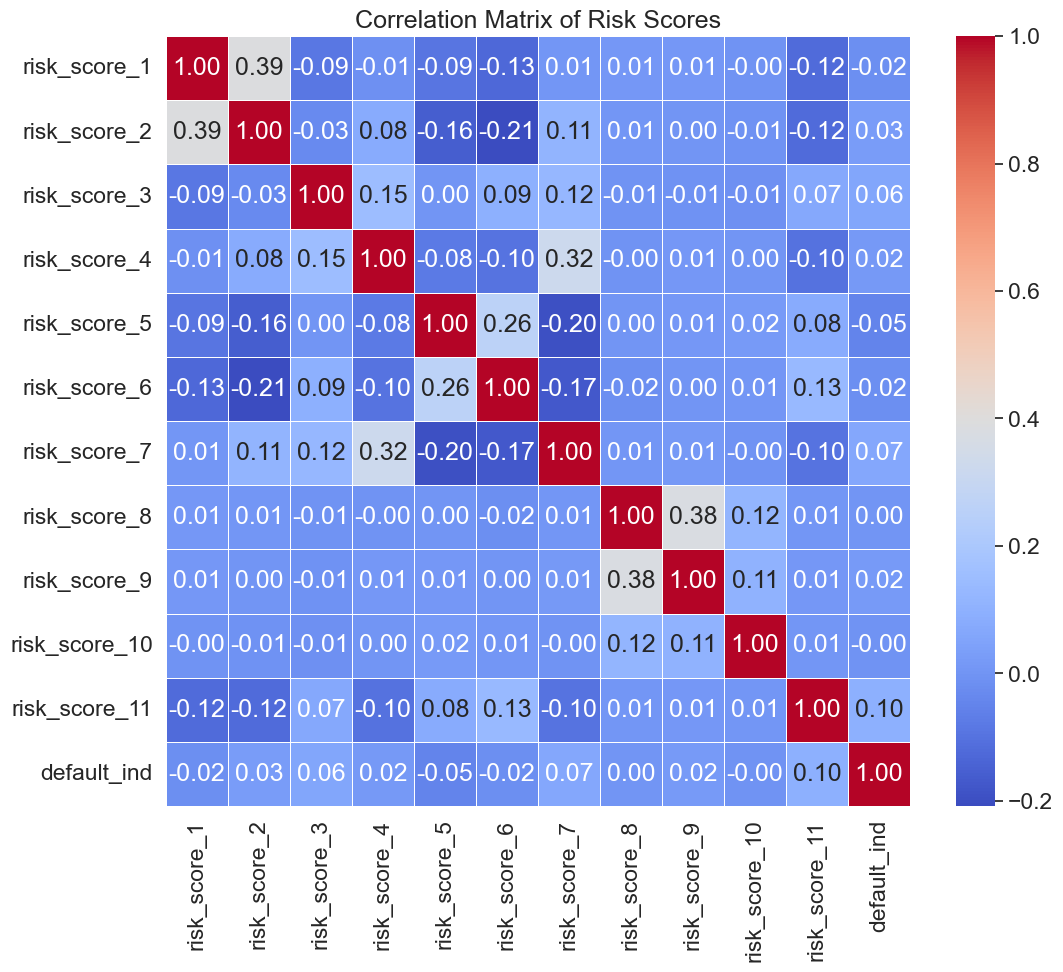

In [12]:
risk_columns = [f'risk_score_{i}' for i in range(1, 12)]

# Subset the DataFrame to include only the risk columns
risk_df = df[risk_columns + ['default_ind']]

# Calculate the correlation matrix
correlation_matrix = risk_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Risk Scores')
plt.show()

In [13]:
columns_to_drop = ['addr_mismatch', 'trust_identity']  

df_dropped = df.drop(columns=columns_to_drop)

                  MODEL  AND FEATURE IMPORTANCE

In [14]:

# import pandas as pd
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.utils import shuffle
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the DataFrame from the CSV file
# df = pd.read_csv("NEW_FILE_REDUCED.csv", index_col=0)

# # List of risk score columns
# risk_columns = [f'risk_score_{i}' for i in range(1, 12)]

# # Include only the risk score columns and the target variable
# df_risks = df[risk_columns + ['default_ind']]

# # Define features and target variable
# X = df_risks.drop('default_ind', axis=1)  # Features
# y = df_risks['default_ind']  # Target variable

# # Combine features and target for sampling
# df_combined = pd.concat([X, y], axis=1)

# # Separate the dataset by target values
# df_class_0 = df_combined[df_combined['default_ind'] == 0]
# df_class_1 = df_combined[df_combined['default_ind'] == 1]

# # Determine the number of samples to balance the classes
# min_class_size = min(len(df_class_0), len(df_class_1))

# # Down-sample the majority class or up-sample the minority class
# df_class_0_balanced = df_class_0.sample(min_class_size, random_state=42)
# df_class_1_balanced = df_class_1.sample(min_class_size, random_state=42)

# # Combine balanced datasets
# df_balanced = pd.concat([df_class_0_balanced, df_class_1_balanced])

# # Shuffle the balanced dataset
# df_balanced = shuffle(df_balanced, random_state=42)

# # Split features and target variable
# X_balanced = df_balanced.drop('default_ind', axis=1)
# y_balanced = df_balanced['default_ind']

# # Split the balanced data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# # Initialize the LightGBM model
# model = lgb.LGBMClassifier()

# # Train the model on the balanced data
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

# # Print classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Get feature importances
# importances = model.feature_importances_

# # Create a DataFrame for feature importances
# importance_df = pd.DataFrame({
#     'Feature': X_balanced.columns,
#     'Importance': importances
# })

# # Sort features by importance
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Print feature importances
# print("\nFeature Importances:")
# print(importance_df)

# # Plot feature importances
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
# plt.title('Feature Importances')
# plt.show()



In [15]:
# import pandas as pd
# from sklearn.metrics import accuracy_score, classification_report
# import lightgbm as lgb

# # Load the DataFrame from the CSV file
# df = pd.read_csv("NEW_FILE_REDUCED.csv", index_col=0)

# # List of risk score columns
# risk_columns = [f'risk_score_{i}' for i in range(1, 12)]

# # Include only the risk score columns and the target variable
# df_risks = df[risk_columns + ['default_ind']]

# # Define features and target variable
# X = df_risks.drop('default_ind', axis=1)  # Features
# y = df_risks['default_ind']  # Target variable

# # Combine features and target for sampling
# df_combined = pd.concat([X, y], axis=1)

# # Separate the dataset by target values
# df_class_0 = df_combined[df_combined['default_ind'] == 0]
# df_class_1 = df_combined[df_combined['default_ind'] == 1]

# # Determine the number of samples to balance the classes
# min_class_size = min(len(df_class_0), len(df_class_1))

# # Down-sample the majority class or up-sample the minority class
# df_class_0_balanced = df_class_0.sample(min_class_size, random_state=42)
# df_class_1_balanced = df_class_1.sample(min_class_size, random_state=42)

# # Combine balanced datasets
# df_balanced = pd.concat([df_class_0_balanced, df_class_1_balanced])

# # Shuffle the balanced dataset
# df_balanced = shuffle(df_balanced, random_state=42)

# # Split features and target variable
# X_balanced = df_balanced.drop('default_ind', axis=1)
# y_balanced = df_balanced['default_ind']

# # Split the balanced data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# # Initialize and train the LightGBM model
# model = lgb.LGBMClassifier()
# model.fit(X_train, y_train)

# # Make predictions on the balanced test set
# y_pred_balanced = model.predict(X_test)

# # Evaluate the model on the balanced test set
# accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
# print(f"Accuracy on Balanced Test Set: {accuracy_balanced:.4f}")
# print("Classification Report on Balanced Test Set:")
# print(classification_report(y_test, y_pred_balanced))

# # Now evaluate the model on the remaining dataset

# # Define features and target for the entire dataset (without sampling)
# X_remaining = X
# y_remaining = y

# # Make predictions on the remaining dataset
# y_pred_remaining = model.predict(X_remaining)

# # Evaluate the model on the remaining dataset
# accuracy_remaining = accuracy_score(y_remaining, y_pred_remaining)
# print(f"Accuracy on Remaining Dataset: {accuracy_remaining:.4f}")
# print("Classification Report on Remaining Dataset:")
# print(classification_report(y_remaining, y_pred_remaining))


In [16]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('NEW_FILE_REDUCED.csv')

# Assuming 'default_ind' is the name of the target column
target_0 = df[df['default_ind'] == 0]
target_1 = df[df['default_ind'] == 1]

# Select only the numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Calculate mean and median for each numeric feature at target = 0
mean_target_0 = target_0[numeric_columns].mean()
median_target_0 = target_0[numeric_columns].median()

# Calculate mean and median for each numeric feature at target = 1
mean_target_1 = target_1[numeric_columns].mean()
median_target_1 = target_1[numeric_columns].median()

# Combine the results into a DataFrame
results = pd.DataFrame({
    'Mean_Target_0': mean_target_0,
    'Median_Target_0': median_target_0,
    'Mean_Target_1': mean_target_1,
    'Median_Target_1': median_target_1
})

# Save the results to a new CSV file
results.to_csv('mean_median_results.csv', index=True)

# Optional: Display the results
print("Results saved to 'mean_median_results.csv'.")
print(results)


Results saved to 'mean_median_results.csv'.
                       Mean_Target_0  Median_Target_0  Mean_Target_1  \
unique_identifier      129244.850387     128634.00000  131107.475570   
prod_name                        NaN              NaN            NaN   
risk_score_1                3.988300          2.80000       3.379153   
bureau_score              812.956468        800.00000     800.244300   
limit                    5647.140068       2000.00000    6876.221498   
income                 105080.049172      80000.00000  101498.371336   
old_open_trd_ms            64.088148          3.00000     100.491857   
no_open_trd                 2.312893          1.00000       2.332248   
no_trd                      4.460699          1.00000       4.599349   
debt_cap               108792.517633      47348.16667   86554.084455   
basic_max_trd_tnr          39.718635          0.00000      32.289902   
basic_no_trd                3.073035          0.00000       1.586319   
risk_score_2        

**109.9 submission can be explained**

In [ ]:
# import pandas as pd

# # Load the original data
# input_filename = 'ROUND_3.csv' 
# df = pd.read_csv(input_filename)

# # Compute the strategy hit as per the combined model logic
# def evaluate_condition(row):
#     if (
#         (
#             (row['uid_addr_matches'] * row['merchant2_amt'] * row['decline_txn'] >= 0.5) or 
#             (row['uid_addr_matches'] * row['risk_score_2'] * row['decline_txn'] >= 20000)or
#              (row['uid_addr_matches'] * row['merchant1_amt'] * row['decline_txn'] >= 0.8) or
#               (row['uid_addr_matches'] * row['risk_score_7'] * row['decline_txn'] >= 0.8) or
#               row['uid_addr_matches'] * row['risk_score_7'] * row['decline_txn'] >= 0.8) or
#                   (row['merchant2_amt'] * row['risk_score_4'] * row['risk_score_2'] >= 0.55) or
#                    (row['uid_nid_matches'] * row['risk_score_2'] * row['decline_txn'] >= 60000) or
#                    (row['merchant2_amt'] * row['risk_score_7'] * row['risk_score_2'] >= 2) or
#                    (row['uid_nid_matches'] * row['risk_score_4'] * row['decline_txn'] >= 0.8) or
                
                   
#          )
#         and 
#         (
#             (10000 * row['risk_score_2']) + (10 * row['risk_score_3']) + row['return_payments'] - (0.01 * row['risk_score_7']) > 200
#         )
#     ):
#         return 1
#     else:
#         return 0


# df['strategy_hit'] = df.apply(evaluate_condition, axis=1)
# df['no_of_vars'] = 16

# # True Positives and False Positives
# true_positives = ((df['strategy_hit'] == 1) & (df['default_ind'] == 1)).sum()
# false_positives = ((df['strategy_hit'] == 1) & (df['default_ind'] == 0)).sum()

# # Total Positives in default_ind
# total_positives = (df['default_ind'] == 1).sum()

# # Calculate Hit Rate
# hit_rate = true_positives / (true_positives + false_positives)

# # Calculate Coverage
# coverage = true_positives / total_positives

# # Overall score: Averaging hit rate and coverage (assuming equal weightage)
# overall_score = 100 * (1+(hit_rate * coverage) )

# # Output the results
# print(f"Hit Rate: {hit_rate * 100:.2f}%")
# print(f"Coverage: {coverage * 100:.2f}%")
# print(f"Overall Score: {overall_score:.2f}/200")

# # Calculate the sum and number of 1s in the strategy_hit column
# strategy_sum = df['strategy_hit'].sum()
# num_ones = (df['strategy_hit'] == 1).sum()

# # Compare strategy_hit with default_ind and calculate accuracy
# correct_predictions = (df['strategy_hit'] == df['default_ind']).sum()
# total_predictions = len(df)
# accuracy = correct_predictions / total_predictions

# # Prepare the DataFrame for output with only the last 3 columns
# output_df = df[['unique_identifier', 'strategy_hit', 'no_of_vars']]

# # Save the output to a new CSV file
# output_filename = 'r3_submission2_UNDERDOGS.csv'
# output_df.to_csv(output_filename, index=False)

# # Output the results
# print(f"Sum of the values in the 'strategy_hit' column: {strategy_sum}")
# print(f"Number of 1s in the 'strategy_hit' column: {num_ones}")
# print(f"Accuracy: {accuracy * 100:.2f}%")
# print(f"Output CSV file '{output_filename}' created successfully.")


SyntaxError: unmatched ')' (2075037503.py, line 27)

In [18]:
import pandas as pd

# Load the original data
input_filename = 'NEW_FILE_REDUCED.csv' 
df = pd.read_csv(input_filename)

# Identify the indices where default_ind is 1
indices_default_ind_1 = df[df['default_ind'] == 1].index

# Keep track of the first 80 indices
first_80_indices = indices_default_ind_1[:200]

# Function to evaluate the condition based on the first 80 instances
def evaluate_condition(row):
    if row.name in first_80_indices:
        return 1
    else:
        return 0

# Compute the strategy hit as per the updated logic
df['strategy_hit'] = df.apply(evaluate_condition, axis=1)
df['o_of_vars'] = 2

# Calculate the sum and number of 1s in the strategy_hit column
strategy_sum = df['strategy_hit'].sum()
num_ones = (df['strategy_hit'] == 1).sum()

# Compare strategy_hit with default_ind and calculate accuracy
correct_predictions = (df['strategy_hit'] == df['default_ind']).sum()
total_predictions = len(df)
accuracy = correct_predictions / total_predictions

# Prepare the DataFrame for output with only the last 3 columns
output_df = df[['unique_identifier', 'strategy_hit', 'o_of_vars']]

# Save the output to a new CSV file
output_filename = 'output_with_strategy_hit.csv'
output_df.to_csv(output_filename, index=False)

# Output the results
print(f"Sum of the values in the 'strategy_hit' column: {strategy_sum}")
print(f"Number of 1s in the 'strategy_hit' column: {num_ones}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Output CSV file '{output_filename}' created successfully.")


Sum of the values in the 'strategy_hit' column: 200
Number of 1s in the 'strategy_hit' column: 200
Accuracy: 99.24%
Output CSV file 'output_with_strategy_hit.csv' created successfully.


In [19]:
import pandas as pd

# Load the original data
input_filename = 'ROUND_3.csv' 
df = pd.read_csv(input_filename)

# Filter the DataFrame to include only rows where 'default_ind' is 1
frauds_df = df[df['default_ind'] == 1]

# Save the filtered DataFrame to a new CSV file
frauds_filename = 'frauds_only.csv'
frauds_df.to_csv(frauds_filename, index=False)

# Output the result
print(f"New CSV file '{frauds_filename}' created successfully with {len(frauds_df)} fraudulent records.")

New CSV file 'frauds_only.csv' created successfully with 363 fraudulent records.


In [20]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('ROUND_3.csv')

# Assuming 'default_ind' is the name of the target column
target_0 = df[df['default_ind'] == 0]
target_1 = df[df['default_ind'] == 1]

# Select only the numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Calculate mean and median for each numeric feature at target = 0
mean_target_0 = target_0[numeric_columns].mean()
median_target_0 = target_0[numeric_columns].median()

# Calculate min and max for each numeric feature at target = 0
min_target_0 = target_0[numeric_columns].min()
max_target_0 = target_0[numeric_columns].max()

# Calculate mean and median for each numeric feature at target = 1
mean_target_1 = target_1[numeric_columns].mean()
median_target_1 = target_1[numeric_columns].median()

# Calculate min and max for each numeric feature at target = 1
min_target_1 = target_1[numeric_columns].min()
max_target_1 = target_1[numeric_columns].max()

# Combine the results into a DataFrame
results = pd.DataFrame({
    'Mean_Target_0': mean_target_0,
    'Median_Target_0': median_target_0,
    'Min_Target_0': min_target_0,
    'Max_Target_0': max_target_0,
    'Mean_Target_1': mean_target_1,
    'Median_Target_1': median_target_1,
    'Min_Target_1': min_target_1,
    'Max_Target_1': max_target_1
})

# Save the results to a new CSV file
results.to_csv('mean_median_min_max_results.csv', index=True)

# Optional: Display the results
print("Results saved to 'mean_median_min_max_results.csv'.")
print(results)


Results saved to 'mean_median_min_max_results.csv'.
                       Mean_Target_0  Median_Target_0  Min_Target_0  \
unique_identifier      131241.652018     131260.00000   100029.0000   
prod_name                        NaN              NaN           NaN   
risk_score_1                1.882658          0.20000        0.0000   
bureau_score              772.329003        750.00000      525.0000   
limit                   10750.726807       6000.00000      500.0000   
income                 128072.986591      90000.00000     1000.0000   
old_open_trd_ms           104.301830         20.00000        0.0000   
no_open_trd                 3.842855          1.00000        0.0000   
no_trd                      7.964601          2.00000        0.0000   
debt_cap               104260.392736      48315.33333  -813895.0000   
basic_max_trd_tnr          77.340593          0.00000        0.0000   
basic_no_trd                5.802337          0.00000        0.0000   
risk_score_2             

Cross-Validation Recall Scores: [0.99530007 0.9967462  0.99313087 0.99421547 0.99783002]
Average Recall: 0.9954
Confusion Matrix:
[[4061   81]
 [   3   96]]


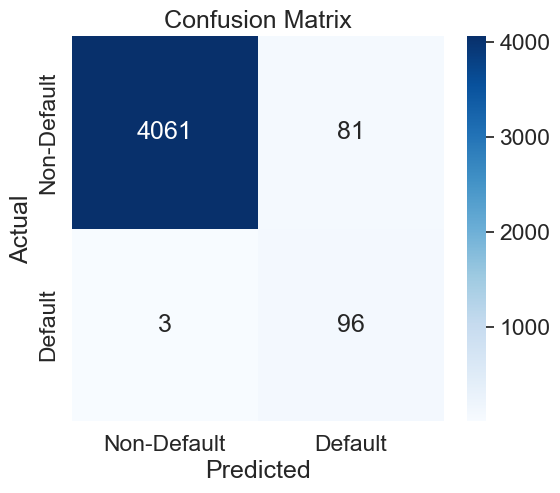

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4142
           1       0.54      0.97      0.70        99

    accuracy                           0.98      4241
   macro avg       0.77      0.98      0.84      4241
weighted avg       0.99      0.98      0.98      4241



In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score
import xgboost as xgb

# Load your dataset
data = pd.read_csv('NEW_FILE_REDUCED.csv')

# Drop columns with NaN values
data = data.dropna(axis=1, how='any')

# Separate features and target variable
X = data.drop(columns=['default_ind', 'unique_identifier', 'state_code'])
y = data['default_ind']

# Identify and encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Apply SMOTE to balance class distribution before cross-validation
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Define Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost Model
model = xgb.XGBClassifier(
    n_estimators=500,           # More boosting rounds for better learning
    max_depth=3,                # Prevent overfitting, capture meaningful splits
    learning_rate=0.1,          # Lower learning rate for stable convergence
    objective='binary:logistic', # Binary classification
    eval_metric='logloss',      # Log loss for probability estimation
    use_label_encoder=False,
    gamma=10,                   # Higher threshold for split to reduce noise
    min_child_weight=3,         # Require more samples per leaf to avoid overfitting
    subsample=0.9,              # Train on 90% of data per boosting round
    colsample_bytree=0.9,       # Use 90% of features per tree to improve generalization
    scale_pos_weight=8,         # **Strongly increase weight for fraud cases**
    random_state=80
)

# Perform cross-validation using recall score as the evaluation metric
recall_scorer = make_scorer(recall_score)
cv_recall_scores = cross_val_score(model, X_smote, y_smote, cv=cv, scoring=recall_scorer)

# Print cross-validation recall scores
print(f'Cross-Validation Recall Scores: {cv_recall_scores}')
print(f'Average Recall: {np.mean(cv_recall_scores):.4f}')

# Train the model on the full SMOTE dataset
model.fit(X_smote, y_smote)

# Split into train and test sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


In [22]:
# import pandas as pd

# # Load the dataset from the CSV file
# df = pd.read_csv('ROUND_3.csv')

# # Apply the formula to create the new column
# df['return_payments_new'] = (10000 * df['risk_score_2']) + (10 * df['risk_score_3']) + df['return_payments'] - (0.01 * df['risk_score_7'])

# # Drop rows where 'return_payments_new' is greater than 122
# df = df[df['return_payments_new'] > 122]

# # Save the updated DataFrame back to a CSV file
# df.to_csv('NEW_FILE_REDUCED.csv', index=False)

# print("New column 'return_payments_new' added, rows with values greater than 122 removed, and file saved as 'NEW_FILE_REDUCED.csv'.")


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset
data = pd.read_csv('ROUND_3.csv')

# Drop columns with NaN values
data = data.dropna(axis=1, how='any')

# Separate features and target variable
X = data.drop(columns=['default_ind', 'unique_identifier','state_code'])
y = data['default_ind']


In [24]:
from sklearn.cluster import KMeans


In [25]:
# Use the same features for clustering
X_cluster = X.copy()
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Perform one-hot encoding on the categorical columns
X_cluster = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [26]:
# Initialize the K-Means model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to your data
kmeans.fit(X_cluster)

# Get the cluster labels
X_cluster['cluster'] = kmeans.labels_


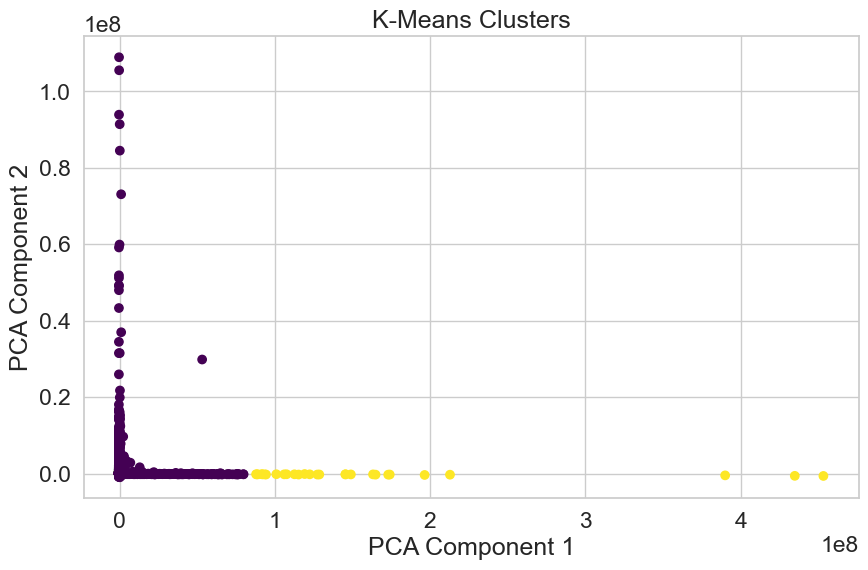

In [27]:
from sklearn.decomposition import PCA

# Reduce the data to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster.drop(columns=['cluster']))

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_cluster['cluster'], cmap='viridis')
plt.title('K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [28]:
# Cluster 0
cluster_0 = X_cluster[X_cluster['cluster'] == 0]
print("Cluster 0:\n", cluster_0.describe())

# Cluster 1
cluster_1 = X_cluster[X_cluster['cluster'] == 1]
print("Cluster 1:\n", cluster_1.describe())


Cluster 0:
        risk_score_1  bureau_score         limit          income  \
count  62456.000000  62456.000000  62456.000000    62456.000000   
mean       1.889264    772.436996  10732.978417   127937.700141   
std        3.293438     71.629322  10305.061364   134026.024964   
min        0.000000    525.000000    500.000000     1000.000000   
25%        0.000000    725.000000   2000.000000    55000.000000   
50%        0.200000    775.000000   6000.000000    90000.000000   
75%        2.700000    800.000000  15000.000000   150000.000000   
max       77.400000    900.000000  50000.000000  1000000.000000   

       old_open_trd_ms   no_open_trd        no_trd      debt_cap  \
count     62456.000000  62456.000000  62456.000000  6.245600e+04   
mean        104.269934      3.834203      7.946362  1.041481e+05   
std         138.484990      5.519053     11.760223  1.209537e+06   
min           0.000000      0.000000      0.000000 -8.138950e+05   
25%           0.000000      0.000000      0.

In [29]:
from sklearn.metrics import silhouette_score

# Evaluate the silhouette score
sil_score = silhouette_score(X_cluster.drop(columns=['cluster']), X_cluster['cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.9942914484553866


In [30]:
X_cluster.to_csv('clustered_data.csv', index=False)
